### q-box

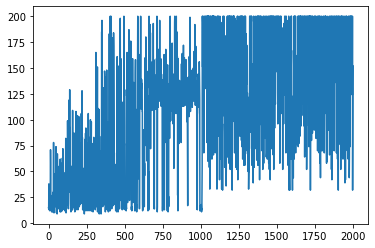

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import gym
import math
import random

def get_box(s):

    x,x_dot,theta,theta_dot=s
    # X_pos Pass
    if x < -.8:
        box_idx = 0
    elif x < .8:
        box_idx = 1
    else:
        box_idx = 2

    if x_dot < -.5:
        pass
    elif x_dot < .5:
        box_idx += 3
    else:
        box_idx += 6

    if theta < np.radians(-12):
        pass
    elif theta < np.radians(-1.5):
        box_idx += 9
    elif theta < np.radians(0):  
        box_idx += 18
    elif theta < np.radians(1.5):
        box_idx += 27
    elif theta < np.radians(12):
        box_idx += 36
    else:
        box_idx += 45

    if theta_dot < np.radians(-50):
        pass
    elif theta_dot < np.radians(50):
        box_idx += 54
    else:
        box_idx += 108

    return box_idx

def e_greedy(q,epsilon,n_a):

    if random.random()<epsilon:
        a=np.random.randint(0,n_a)
    else:
        a=np.argmax(q)

    return a

def run_qbox(n_eps=2000,n_stps=200,gm=0.99,lr=0.1,epsilon=1,epsilon_rate=0.995):

    env=gym.make("CartPole-v0")
    n_s=env.observation_space.shape[0]
    n_a=env.action_space.n

    Q=np.random.rand(162,n_a)
    r_all,stp_all=[],[]
    q_all=[]

    for ep in range(n_eps):

        s=env.reset()
        s_int=get_box(s)
        r_sum=0 

        for stp in range(n_stps):

            q_all.append(Q[s_int])
            a=e_greedy(Q[s_int],epsilon,n_a)
            s_,r,done,_=env.step(a)
            s_int_=get_box(s_)

            delta=r+gm*np.max(Q[s_int_])-Q[s_int,a]
            Q[s_int,a]+=lr*delta

            s=s_
            s_int=s_int_
            r_sum+=r

            if done:
                break

        r_all.append(r_sum)
        stp_all.append(stp)
        epsilon*=epsilon_rate
        #if ep%(n_eps//5)==0 or ep==n_eps-1:
        #    print(f"ep:{ep}, stp:{stp}, r:{np.round(r_sum,2)},eps:{epsilon}")

    return r_all,stp_all,q_all


r,s,q=run_qbox()

plt.plot(r)

### q-bin

ep:0, stp:10, r:11.0, eps:0.999
ep:200, stp:33, r:34.0, eps:0.8178301806491574
ep:400, stp:59, r:60.0, eps:0.6695157201007336
ep:600, stp:16, r:17.0, eps:0.548098260578011
ep:800, stp:70, r:71.0, eps:0.44869999946146477
ep:1000, stp:95, r:96.0, eps:0.36732772934619257
ep:1200, stp:73, r:74.0, eps:0.3007124156643058
ep:1400, stp:183, r:184.0, eps:0.2461778670932771
ep:1600, stp:154, r:155.0, eps:0.2015332227394583
ep:1800, stp:199, r:200.0, eps:0.1649849368967147
ep:1999, stp:199, r:200.0, eps:0.1351999253974994


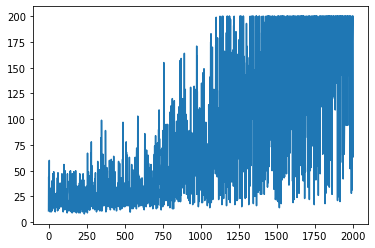

In [4]:
def discretize(s,bins,n_s):
    idx=[]
    for i in range(n_s):
        idx.append(np.digitize(s[i],bins[i])-1) # -1 will turn bin into index
    return tuple(idx)

def e_greedy(q,eps,n_a):
    if random.random()<eps:
        a=np.random.randint(0,n_a)
    else:
        a=np.argmax(q)

    return a

def run_qbin(n_bins=15,n_eps=2000,n_stps=200,gm=0.99,lr=0.1,eps=1,eps_decay=0.999):

    env=gym.make('CartPole-v0')
    n_a=env.action_space.n
    n_s=env.observation_space.shape[0]
    bins=[np.linspace(-2.4,2.4,n_bins),
          np.linspace(-2,2,n_bins),
          np.linspace(-.2618,.2618,n_bins),
          np.linspace(-2,2,n_bins)]
    
    #shape (n_bins,n_bins,n_bins,n_bins,n_a)
    #i.e. (15,15,15,15,2)
    Q=np.zeros(([len(bins[0])]*n_s+[n_a]))
    
    r_all,stp_all,q_all=[],[],[]

    for ep in range(n_eps):

        r_sum,done=0,False
        s_int=discretize(env.reset(),bins,n_s)

        for stp in range(n_stps):

            q_all.append(Q[s_int])
            a=e_greedy(Q[s_int],eps,n_a)
            s_,r,done,_=env.step(a)
            s_int_=discretize(s_,bins,n_s)

            delta=r+gm*np.max(Q[s_int_])-Q[s_int][a]
            Q[s_int][a]+=lr*delta

            s=s_
            s_int=s_int_
            r_sum+=r

            if done:
                break

        eps*=eps_decay
        if ep%(n_eps//10)==0 or ep==n_eps-1:
            print(f"ep:{ep}, stp:{stp}, r:{np.round(r_sum,2)}, eps:{eps}")

        r_all.append(r_sum)
        stp_all.append(stp)
        
    return r_all,stp_all,q_all

r,s,q=run_qbin(n_bins=15)
plt.plot(r)

### sarsa($\lambda$)

ep:0, stp:34, r:35.0, eps:0.995
ep:200, stp:127, r:128.0, eps:0.36512303261753626
ep:400, stp:199, r:200.0, eps:0.13398475271138335
ep:600, stp:199, r:200.0, eps:0.04916675299948831
ep:800, stp:164, r:165.0, eps:0.018042124582040707
ep:1000, stp:137, r:138.0, eps:0.0066206987359377885
ep:1200, stp:161, r:162.0, eps:0.0024295171864449163
ep:1400, stp:120, r:121.0, eps:0.0008915303345841139
ep:1600, stp:197, r:198.0, eps:0.00032715402958178723
ep:1800, stp:162, r:163.0, eps:0.0001200517300642707
ep:1999, stp:199, r:200.0, eps:4.4275297848083e-05


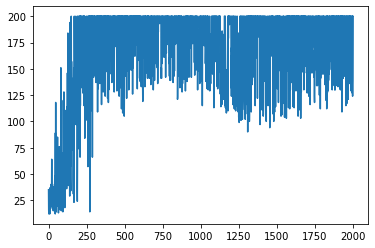

In [6]:
def get_feature(s,center,sigma):

    rbf={}
    f=1 #feature
    for i in range(4):
        rbf[i]=np.exp(-(s[i]-center[i])**2/(2*sigma[i]**2))
        f=np.outer(f,rbf[i])
        f=f.ravel()

    return f

def get_Q(F,w):
    Q=np.dot(w.T,F)
    return Q

def get_Q_a(F,a,w):
    Q=np.dot(w[:,a],F)
    
def e_greedy_2(e,Q,n_a):
    rand=np.random.random()
    if rand<1.-e:
        a=Q.argmax()
    else:
        a=np.random.randint(0,n_a)
    return int(a)

def run_sarsalmd(n_eps=2000,n_stps=200,gm=0.99,lr=0.1,lmd=0.5,epsilon=1,epsilon_rate=0.995):

    env=gym.make("CartPole-v0")
    n_s=env.observation_space.shape[0]
    n_a=env.action_space.n

    s_range=np.zeros((2,n_s))
    s_range[0,:]=np.array([-2.4,-4,-np.radians(30),-np.radians(180)])
    s_range[1,:]=np.array([2.4,4,np.radians(30),np.radians(180)])

    n_rbf=np.array([3,3,5,5]).astype(int)
    n_feature=np.prod(n_rbf)
    w=np.zeros((n_feature,n_a))

    interval={}
    center={}
    sigma={}
    
    for i in range(n_s):
        interval[i]=(s_range[1,i]-s_range[0,i])/(n_rbf[i]-1)
        sigma[i]=interval[i]/2
        center[i]=[np.around(s_range[0,i]+j*interval[i],2) for j in range(n_rbf[i])]
    
    r_all,stp_all=[],[]
    q_all=[]

    for ep in range(n_eps):

        r_sum,done=0,False
        #eligibility traces
        e=np.zeros((n_feature,n_a))
        F=get_feature(env.reset(),center,sigma)
        Q_old=get_Q(F,w)
        a=e_greedy_2(epsilon,Q_old,n_a)

        for stp in range(n_stps):

            #show animation of last 5 episodes
            #if ep>n_eps-5:
            #    env.render()

            q_all.append(Q_old)
            s_,r,done,_=env.step(a)
            F_=get_feature(s_,center,sigma)
            Q=get_Q(F_,w)
            a_=e_greedy_2(epsilon,Q,n_a)

            if done:
                delta=r-Q_old[a]
            else:
                delta=r+gm*Q[a_]-Q_old[a]

            e[:,a]=F

            for m in range(n_feature):
                for n in range(n_a):
                    w[m,n]+=lr*delta*e[m,n]

            e*=gm*lmd

            s=s_
            F=F_
            a=a_
            Q_old=Q
            r_sum+=r

            if done:
                break

        r_all.append(r_sum)
        stp_all.append(stp)
        epsilon*=epsilon_rate
        if ep%(n_eps//10)==0 or ep==n_eps-1:
            print(f"ep:{ep}, stp:{stp}, r:{np.round(r_sum,2)}, eps:{epsilon}")
        
    return r_all,stp_all,q_all

r,s,q=run_sarsalmd()

plt.plot(r)